In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, string, random
from IPython.core.display import display
from IPython.display import clear_output
from PIL import Image, ImageFont, ImageDraw

Let's load the initial image file and display it

83.7617 KB


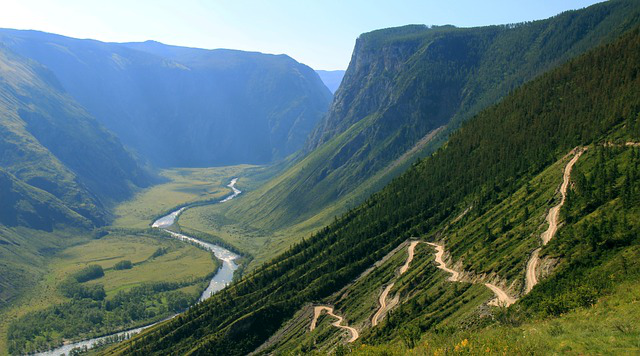

In [2]:
loc = 'stock/valley.jpg'
img = Image.open(loc)
osize = os.stat(loc).st_size/1024
print('%0.4f KB' % (osize))
img

Let's convert the image into a width x height x 3 numpy array

In [3]:
img = np.array(img)

Normalize the uint values so they're between 0 and 1

In [4]:
row, col, _ = img.shape
img = img / 255
print(row, col)

356 640


Perform SVD on each of the color matrices

In [5]:
U_r, sigma_r, V_r = np.linalg.svd(img[:, :, 0])
U_g, sigma_g, V_g = np.linalg.svd(img[:, :, 1])
U_b, sigma_b, V_b = np.linalg.svd(img[:, :, 2])

Loading the font for labeling the number of components

In [6]:
font = ImageFont.truetype("Prototype.ttf", 30)
font_col = 255, 255, 0

Visualization of the Image as the number of components increases. The idea is to add $i$ components, save the image to file, then measure the output file size, and repeat for all components.

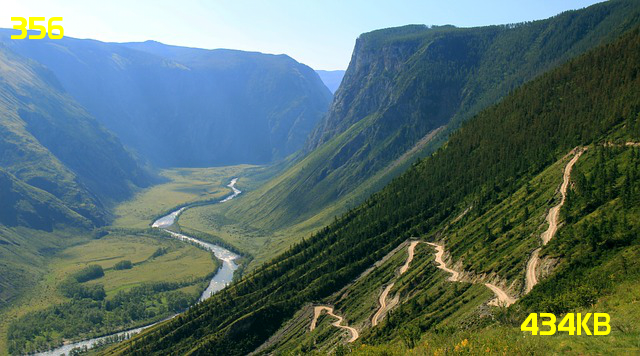

In [7]:
plotx = []
ploty1 = []
ploty2 = []
for i in range(1, len(sigma_r)+1):
    clear_output(wait=True)
    
    # reconstruct with i components
    reconstimg = np.zeros((row, col, 3))
    reconstimg[:, :, 0] = np.dot(U_r[:, :i], np.dot(np.diag(sigma_r[:i]), V_r[:i, :]))
    reconstimg[:, :, 1]= np.dot(U_g[:, :i], np.dot(np.diag(sigma_g[:i]), V_g[:i, :]))
    reconstimg[:, :, 2] = np.dot(U_b[:, :i], np.dot(np.diag(sigma_b[:i]), V_b[:i, :]))
    
    # reduce to valid range
    reconstimg[reconstimg < 0] = 0
    reconstimg[reconstimg > 1] = 1
    
    # store temporary file
    temp = ''.join(random.sample(string.ascii_lowercase, 10)) + '.png'
    img = Image.fromarray(np.uint8(reconstimg*255))
    img.save(os.path.join(temp), compress_level=1)
    
    # collect data
    plotx.append(i)
    size = os.stat(temp).st_size/1024
    ploty1.append(size)
    ploty2.append(size-osize)
    
    # remove temp file
    os.remove(temp)
    
    # display current number of components
    draw = ImageDraw.Draw(img)
    draw.text((10, 10), "%d" % i, font_col, font=font)
    draw.text((col - 120, row - 50), "%3dKB" % size, font_col, font=font)
    display(img)

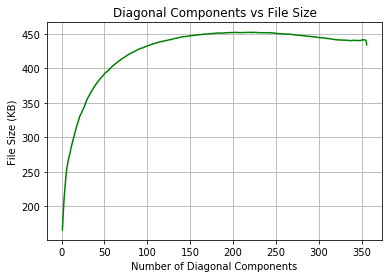

In [8]:
plt.title('Diagonal Components vs File Size')
plt.xlabel('Number of Diagonal Components')
plt.ylabel('File Size (KB)')
plt.grid()
plt.plot(plotx, ploty1, 'g')

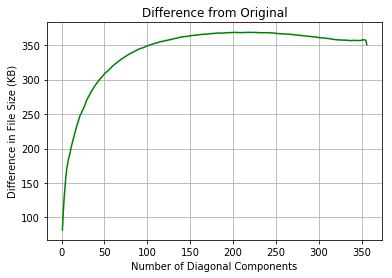

In [9]:
plt.title('Difference from Original')
plt.xlabel('Number of Diagonal Components')
plt.ylabel('Difference in File Size (KB)')
plt.grid()
plt.plot(plotx, ploty2, 'g')